In [1]:
import numpy as np

In [2]:
class Linear_Regression():
  def __init__(self,learning_rate,no_of_iterations):
    self.learning_rate=learning_rate
    self.no_of_iterations=no_of_iterations

  def fit(self,X,Y):
    # m-->no of training examples and n-->no of features
    self.m,self.n=X.shape

    #initiating weight and bias
    self.w=np.zeros(self.n)
    self.b=0
    self.X=X
    self.Y=Y

    #implementing Gradient Descent
    for i in range(self.no_of_iterations):
      self.update_weights()

  def update_weights(self):
    Y_prediction=self.predict(self.X)

    #calculate gradients
    dw= -(2 * (self.X.T).dot(self.Y-Y_prediction))/self.m
    db= -2 * np.sum(self.Y - Y_prediction)/self.m

    #updating the weights
    self.w = self.w - self.learning_rate*dw
    self.b = self.b - self.learning_rate*db

  def predict(self,X):
    return X.dot(self.w)+self.b

Using Lr for prediction

In [46]:
import pandas as pd
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import Linear_Regression as LR

Data preprocessing

In [33]:
salary_data=pd.read_csv('/content/salary_data.csv')

In [34]:
salary_data.head()

,YearsExperience,Salary
0,1.1,39343
1,1.3,46205
2,1.5,37731
3,2.0,43525
4,2.2,39891


In [35]:
salary_data.tail()

,YearsExperience,Salary
25,9.0,105582
26,9.5,116969
27,9.6,112635
28,10.3,122391
29,10.5,121872


In [36]:
salary_data.shape

(30, 2)

In [37]:
#checking for missing values
salary_data.isnull().sum()

YearsExperience    0
Salary             0
dtype: int64

In [38]:
#splitting features and target
X=salary_data.iloc[:,:-1].values #last col
Y=salary_data.iloc[:,1].values  #First col

In [39]:
print(X)
print(Y)

[[ 1.1]
 [ 1.3]
 [ 1.5]
 [ 2. ]
 [ 2.2]
 [ 2.9]
 [ 3. ]
 [ 3.2]
 [ 3.2]
 [ 3.7]
 [ 3.9]
 [ 4. ]
 [ 4. ]
 [ 4.1]
 [ 4.5]
 [ 4.9]
 [ 5.1]
 [ 5.3]
 [ 5.9]
 [ 6. ]
 [ 6.8]
 [ 7.1]
 [ 7.9]
 [ 8.2]
 [ 8.7]
 [ 9. ]
 [ 9.5]
 [ 9.6]
 [10.3]
 [10.5]]
[ 39343  46205  37731  43525  39891  56642  60150  54445  64445  57189
  63218  55794  56957  57081  61111  67938  66029  83088  81363  93940
  91738  98273 101302 113812 109431 105582 116969 112635 122391 121872]


In [40]:
#spliting daatset into training and test data
X_train,X_test,Y_train,Y_test=train_test_split(X,Y,test_size=0.33,random_state=2)

In [47]:
#Training Linear regression model
model=LR.Linear_Regression(learning_rate=0.02,no_of_iterations=2000) #we need to give hyperparameters lr and no_of_iterartions

In [ ]:
model.fit(X_train,Y_train)

In [42]:
#printing parameters values
print('weight=',model.w[0])
print('bias=',model.b)

weight= 9512.94567802552
bias= 23707.80831200335


In [43]:
# y=9514x+23697 trained model look like
test_data_prediction=model.predict(X_test)
print(test_data_prediction)

[ 36074.63769344  34172.04855783  66516.06386312  58905.7073207
  91249.72262598  80785.48238016 101713.96287181  52246.64534608
  42733.69966805  88395.83892258]


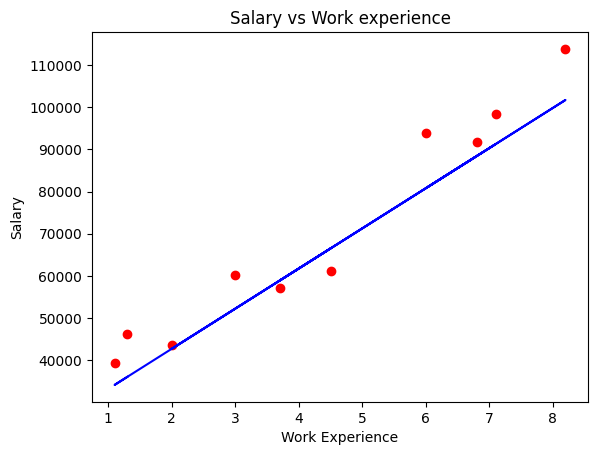

In [44]:
#visulaizing prediction
plt.scatter(X_test,Y_test,color='red')
plt.plot(X_test,test_data_prediction,color='blue')
plt.xlabel('Work Experience')
plt.ylabel('Salary')
plt.title('Salary vs Work experience')
plt.show()